<a href="https://colab.research.google.com/github/Ramazan-lab/machine_learning/blob/main/biomechanical_features_polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/column_2C_weka (1).csv")




In [24]:
df.rename(
    columns=({ 'class': 'pclass'}), 
    inplace=True,
)
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pclass
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [25]:
df.pclass = [1 if each == "Abnormal" else 0 for each in df.pclass]
x = df.pelvic_incidence.values.reshape(-1,1)
y = df.pclass.values.reshape(-1,1)
df = df.drop(["pclass"],axis=1)






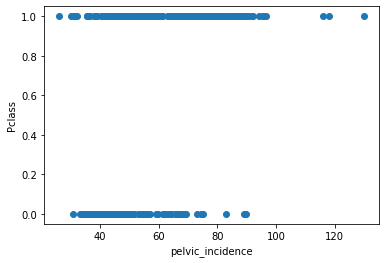

In [27]:

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("Pclass")
plt.show()

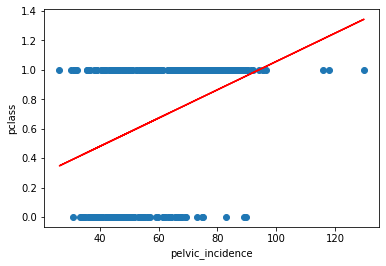

80 predict:  [[0.86461546]]


In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x,y)

#%% predict
y_head = lr.predict(x)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("pclass")

plt.plot(x,y_head,color="red",label ="linear")
plt.show()

print("80 predict: ",lr.predict([[80]]))

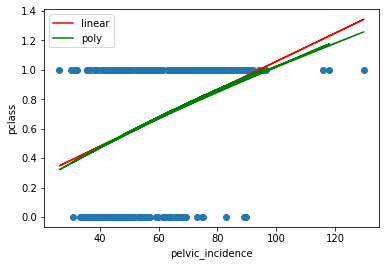

In [30]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 2)

x_polynomial = polynomial_regression.fit_transform(x)

#pr = polynomial_regression()
# %% fit
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)
#pr.fit(x,y)
#y_head3=pr.predict(x)
#print(pr.predict([[3000]]))

# %%

y_head2 = linear_regression2.predict(x_polynomial)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("pclass")
plt.plot(x,y_head,color="red",label ="linear")

plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import r2_score

print("r_square score for linear regression: ", r2_score(y,y_head))

print("r_square score for polynomial regression: ", r2_score(y,y_head2))

r_square score for linear regression:  0.12484622036637771
r_square score for polynomial regression:  0.1252162839901808
